by Suman Kumar Bera
email id: skbera.iitkgp21@gmail.com<br>
LinkdIn: https://www.linkedin.com/in/skbera4/

Topics:
1. Linear Regression
2. Logistic Regression
3. Decision Tree
4. Random Forest

Import Required Libraries

1. **`pandas`**:  
   - Used for data manipulation and analysis.  
   - Allows us to load datasets, handle missing values, and explore data using DataFrames.

2. **`train_test_split`** from `sklearn.model_selection`:  
   - Splits the dataset into training and testing sets.  
   - Ensures that we can train the model on one portion of the data and evaluate it on unseen data.

3. **Machine Learning Models from `sklearn`**:  
   - `LinearRegression`: For predicting continuous numerical values.  
     $\hat{y} = X \mathbf{w} + b$  
   - `LogisticRegression`: For binary classification tasks, outputs probabilitie


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, mean_squared_error
import matplotlib.pyplot as plt


### Generating a Random Dataset

Create a synthetic dataset for demonstrating regression.



In [2]:
import numpy as np

X = np.random.rand(100, 1) * 10 # y = 3 * x + 4
y = 3 * X.flatten() + 4 + np.random.randn(100) #y = 3 * X[:, 0] + 4 + np.random.randn(100) #100 random noise values from a normal (Gaussian) distribution with


**bold text**### Visualizing the Synthetic Data

This cell plots the randomly generated dataset to help us understand the relationship between the feature `X` and the target variable `y`.


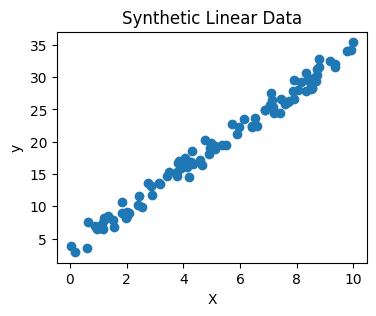

In [3]:
# Plot
plt.figure(figsize=(4, 3))
plt.scatter(X, y)
plt.xlabel("X")
plt.ylabel("y")
plt.title("Synthetic Linear Data")
plt.show()

### Training and Evaluating the Linear Regression Model

In this step, we train a linear regression model, make predictions on the test set, and evaluate how well the model has learned the underlying pattern in the data.

---

## **1. What the Model Learns — Coefficient and Intercept**

### **Coefficient (Slope)**  
The coefficient represents how much the target variable \(y\) changes when the input \(X\) increases by 1 unit.

Linear regression assumes a relationship of the form:

$$
\hat{y} = w x + b
$$

- \(w\) = slope (coefficient)  
- It indicates how strongly \(X\) influences \(y\).

Since our synthetic data was created using:

$$
y = 3x + 4 + \text{noise}
$$

we expect the model to learn a coefficient close to **3**.

---

### **Intercept**

The intercept \(b\) is the value of the prediction when \(x = 0\):

$$
b = \hat{y}(0)
$$

Our generated data uses an intercept of **4**, so the model should recover a value near 4.

---

## **2. Evaluating the Model — MSE and R²**

### **Mean Squared Error (MSE)**

MSE measures the average squared difference between actual values and predicted values:

$$
\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
$$

- Smaller MSE → better prediction accuracy.  
- Squaring penalizes large errors more strongly.

This tells us **how close** the predictions are to the real data.

---

### **R-Squared (Coefficient of Determination)**

If included, R² explains how much of the total variation in the target variable is explained by the model.

$$
R^2 = 1 - \frac{\sum (y_i - \hat{y}_i)^2}{\sum (y_i - \bar{y})^2}
$$

Interpretation:

- \(R^2 = 1\) → perfect model  
- \(R^2 = 0\) → model is no better than guessing the mean  
- \(R^2 < 0\) → model performs worse than the mean predictor  

For our synthetic linear data, R² should be very close to 1.

---

## **Why This Step Is Important**

- Shows the complete regression workflow: training, testing, evaluating.  
- Helps students see how a model **learns parameters** (slope and intercept).  
- Introduces essential evaluation metrics (MSE, R²).  
- Builds intuition for how regression captures relationships in data.



In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

print("MSE:", mse)
print("Coefficient:", model.coef_)
print("Intercept:", model.intercept_)


MSE: 1.1896460494588887
Coefficient: [3.05462089]
Intercept: 3.5905144177209536


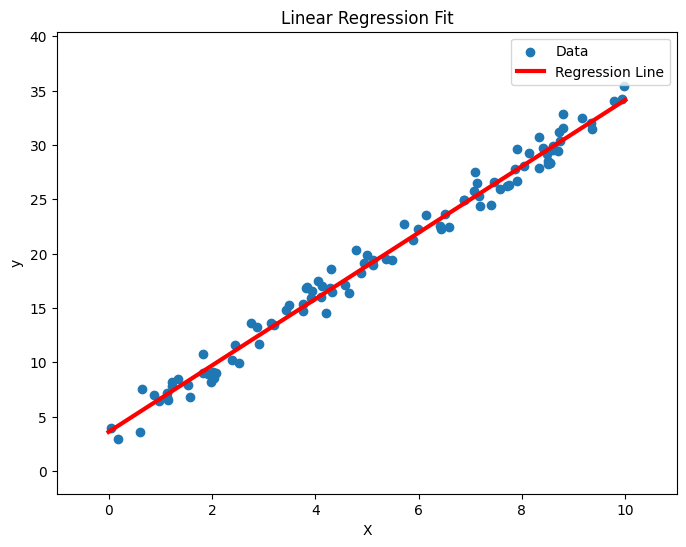

In [5]:
# --- Plot data + regression line ---
plt.figure(figsize=(8, 6))
plt.scatter(X, y, label="Data")

# Create line
X_line = np.linspace(0, 10, 100).reshape(-1, 1)
y_line = model.predict(X_line)

plt.plot(X_line, y_line, linewidth=3, label="Regression Line", color='red')
plt.xlim(-1, 11)
plt.ylim(min(y)-5, max(y)+5)

plt.xlabel("X")
plt.ylabel("y")
plt.title("Linear Regression Fit")
plt.legend()
plt.show()

### Linear Regression

In [6]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## 🛠️ Data Loading and Preprocessing

The initial steps in any machine learning project involve loading the dataset and preparing the features.  
This section explains how the dataset is loaded and how feature values are standardized.

---

## 1. Load Dataset

The code uses the `fetch_california_housing()` function from `sklearn.datasets` to load the **California Housing Dataset**.  
This is a regression dataset where the goal is to predict the *median house value* in California districts.

### Key Steps
- **`fetch_california_housing()`**: Retrieves the dataset, including features and target values.
- **`X = pd.DataFrame(...)`**:  
  The features (input variables) are stored in a Pandas DataFrame named **X** for better handling and readability, using the original feature names.
- **`y = data.target`**:  
  The target variable (median house value, in hundreds of thousands of dollars) is stored in **y**.
- **Dataset Shape**:  
  Printing `X.shape` confirms the number of rows (samples) and columns (features).

---

## 2. Standardize Features (Scaling)

Standardization is a crucial preprocessing step, especially before applying distance-based algorithms or dimensionality reduction methods like **t-SNE**.

### Core Concept: Standardization (Z-Score Normalization)

Standardization transforms the data such that each feature has:

- Mean = 0  
- Standard deviation = 1  

The formula for the Z-score:

$$
\text{Z-Score} = \frac{x - \mu}{\sigma}
$$

Where:  
- \( x \) = original feature value  
- \( \mu \) = mean of the feature  
- \( \sigma \) = standard deviation  

### Why Scale?

#### **1. Equal Contribution**
Features measured on different scales (e.g., population vs. median income) may cause those with large values to dominate the model.  
Scaling ensures each feature contributes equally.

#### **2. Algorithm Requirements**
Distance-based methods and optimization algorithms (e.g., gradient descent used in Linear/Logistic Regression) converge faster and perform better when features are scaled.

### StandardScaler

- **`StandardScaler()`**: Computes the mean and standard deviation of each feature.
- **`fit_transform(X)`**:  
  - *fit*: calculates \( \mu \) and \( \sigma \)  
  - *transform*: applies the Z-score formula  
  Produces the standardized feature matrix **`X_scaled`**.

---


In [7]:
# 1. Load dataset
data = fetch_california_housing()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

print("Dataset shape:", X.shape)

# 2. Standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


Dataset shape: (20640, 8)


In [8]:
data

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]], shape=(20640, 8)),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894], shape=(20640,)),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': 

In [9]:
X[0:1]

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.02381,322.0,2.555556,37.88,-122.23


## 5. Train-Test Split

Before training any model, the dataset must be split to ensure we can evaluate performance on unseen data.

### Key Points
- **`train_test_split()`**: Splits the features (X) and target (y) into training and testing subsets.
- **`test_size=0.2`**:  
  Reserves **20%** of the data for testing and **80%** for training.
- **`random_state=42`**:  
  Ensures reproducibility by generating the same split each time the code is run.

---

## 6. Linear Regression Model Training

- **`model = LinearRegression()`**:  
  Initializes a Linear Regression model. This model learns the best-fit line describing the relationship between the features and the target.

- **`model.fit(X_train, y_train)`**:  
  Trains the model using the training data.  
  The algorithm computes the optimal coefficients \( \beta_i \) and intercept \( \beta_0 \) by minimizing **Mean Squared Error (MSE)**.

---

## 7. Predictions

- **`y_pred = model.predict(X_test)`**:  
  After training, the model predicts target values for the unseen test features (`X_test`).  
  These predictions (`y_pred`) are evaluated against the true values (`y_test`).

---
---





--- Linear Regression Results ---
MSE: 0.555891598695244
R² Score: 0.5757877060324511
Coefficients: [ 4.48674910e-01  9.72425752e-03 -1.23323343e-01  7.83144907e-01
 -2.02962058e-06 -3.52631849e-03 -4.19792487e-01 -4.33708065e-01]
Intercept: -37.023277706064256


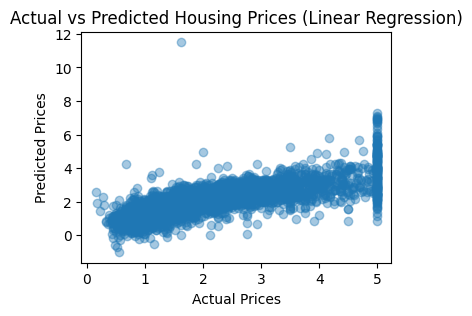

In [10]:
# 5. Train-test split for Linear Regression
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 6. Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)

# 7. Predictions
y_pred = model.predict(X_test)

# 8. Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\n--- Linear Regression Results ---")
print("MSE:", mse)
print("R² Score:", r2)
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

# 9. Plot predicted vs actual
plt.figure(figsize=(4, 3))
plt.scatter(y_test, y_pred, alpha=0.4)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Housing Prices (Linear Regression)")
plt.show()

### Logistic Regression

## 🔬 Classification Data Preparation

This section focuses on **classification** using the Breast Cancer Dataset.  
The goal is to predict whether a tumor is **Malignant (0)** or **Benign (1)** using various diagnostic features.

---

## 1. Load and Examine Dataset

- **`load_breast_cancer()`**  
  Retrieves the dataset from scikit-learn.

### Target Variable (y)
- The target is a **binary variable** (0 or 1), making it suitable for Logistic Regression.
- Class labels (`target_names`):
  - **0** → malignant  
  - **1** → benign

### Features (X)
- The dataset includes **30 numeric features** derived from digitized images of fine needle aspirates (FNAs) of breast masses.  
- Examples: radius, texture, perimeter, area, smoothness, etc.

---

## 2. Standardize Features

Standardization is applied, just as in the regression examples.  
It is essential for algorithms that rely on distances or gradient descent (e.g., Logistic Regression).

### Benefit
Prevents features with larger numerical ranges from dominating the model's training process.

---


In [11]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.manifold import TSNE
from sklearn.metrics import classification_report, confusion_matrix

# Load dataset
data = load_breast_cancer()
X = data.data
y = data.target
feature_names = data.feature_names
target_names = data.target_names

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [12]:

data

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]], shape=(569, 30)),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,

In [13]:
X.shape

(569, 30)

In [14]:
target_names

array(['malignant', 'benign'], dtype='<U9')

## 🎨 Data Visualization with t-SNE

Before applying a classification model, it's helpful to visualize the data to understand how well the classes are separated.  
Because the Breast Cancer dataset contains **30 features**, we use **t-distributed Stochastic Neighbor Embedding (t-SNE)** for dimensionality reduction.

---

## t-SNE (t-distributed Stochastic Neighbor Embedding)

t-SNE is a **non-linear dimensionality reduction** technique used to visualize high-dimensional data in 2D or 3D.

### Core Concept
t-SNE focuses on preserving the **local structure** of the data:
- Similar points → placed close together  
- Dissimilar points → placed far apart  

### Mathematical Goal
t-SNE minimizes the difference between two probability distributions:

1. The distribution measuring similarities in the **high-dimensional space**  
2. The distribution measuring similarities in the **low-dimensional space**

---

## t-SNE Implementation Details

- **`tsne = TSNE(n_components=2, ...)`**  
  Initializes t-SNE to reduce the 30-dimensional dataset to **2 dimensions**.

- **`X_tsne = tsne.fit_transform(X_scaled)`**  
  Applies t-SNE to the standardized features.  
  *Standardization is essential because t-SNE is sensitive to feature scales.*

### Important Hyperparameters

- **`learning_rate`**  
  Controls step size during optimization.  
  Typical values range from **10 to 1000**.

- **`init='random'`**  
  Specifies that initial low-dimensional positions are chosen randomly.

---

## Visualization Interpretation

The resulting scatter plot shows the projection of the data onto a 2D t-SNE map.

### Cluster Separation
- The plot helps determine whether **Benign (Class 1)** and **Malignant (Class 0)** samples form distinct clusters.

### Interpretability
- **Well-separated clusters** → The original features contain strong class-distinguishing information.  
- **Overlapping clusters** → Some samples are ambiguous, potentially leading to classification errors.

---


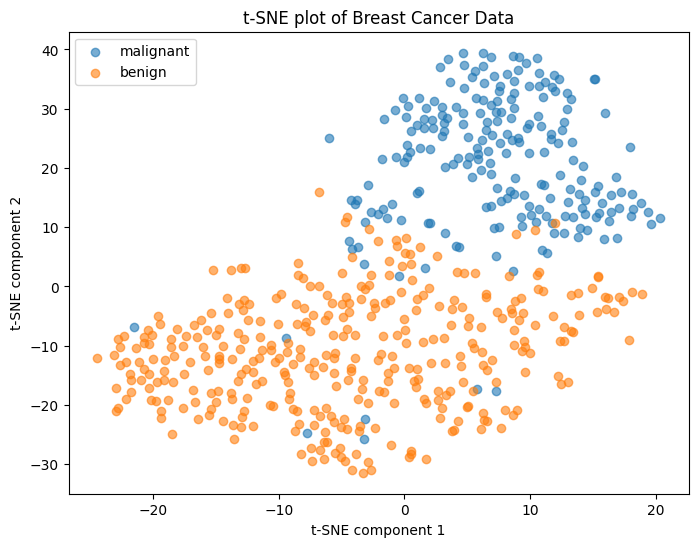

In [15]:
# t-SNE plot
tsne = TSNE(n_components=2, random_state=42, learning_rate=200, init='random')
X_tsne = tsne.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
for label in np.unique(y):
    plt.scatter(X_tsne[y==label, 0], X_tsne[y==label, 1], label=target_names[label], alpha=0.6)
plt.title("t-SNE plot of Breast Cancer Data")
plt.xlabel("t-SNE component 1")
plt.ylabel("t-SNE component 2")
plt.legend()
plt.show()

### Important Evaluation Metrics
- **Accuracy**  
  $$ \text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN} $$

- **Precision**  
  $$ \text{Precision} = \frac{TP}{TP + FP} $$

- **Recall**  
  $$ \text{Recall} = \frac{TP}{TP + FN} $$

- **F1 Score**  
  $$ \text{F1} = 2 \times \frac{\text{Precision} \cdot \text{Recall}}{\text{Precision} + \text{Recall}} $$

In [16]:
# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train Logistic Regression
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

# Predict and evaluate
y_pred = logreg.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

Confusion Matrix:
 [[41  2]
 [ 1 70]]


### Decision Tree

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.93      0.93        43
           1       0.96      0.96      0.96        71

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114

Confusion Matrix:
 [[40  3]
 [ 3 68]]


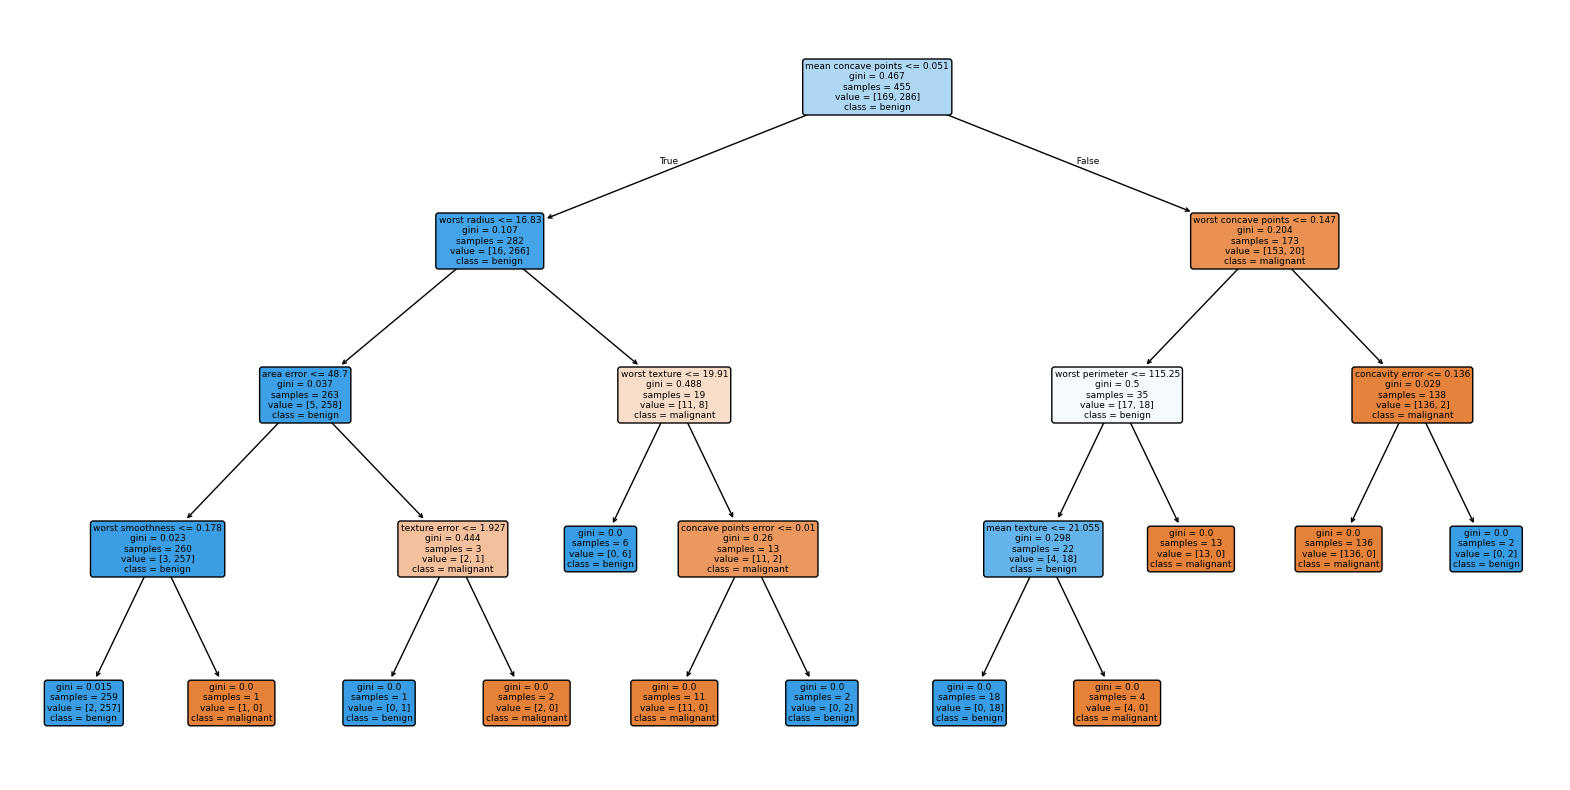

In [17]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix

# Load dataset
data = load_breast_cancer()
X = data.data
y = data.target
feature_names = data.feature_names
target_names = data.target_names

# Optional: scale features (not required for Decision Tree)
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)
# For tree, we can use X directly
X_scaled = X

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train Decision Tree
tree = DecisionTreeClassifier(max_depth=4, random_state=42)  # max_depth limits overfitting
tree.fit(X_train, y_train)

# Predict and evaluate
y_pred = tree.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Plot the decision tree
plt.figure(figsize=(20,10))
plot_tree(tree, feature_names=feature_names, class_names=target_names, filled=True, rounded=True)
plt.show()


In [18]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

from sklearn.metrics import accuracy_score
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred))
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))


Decision Tree Accuracy: 0.9473684210526315
Random Forest Accuracy: 0.9649122807017544


# 🌲 Random Forest Classifier — Explanation

A **Random Forest** is an ensemble machine-learning model that builds many **Decision Trees** and aggregates their predictions.

### Why Random Forest?
- Reduces overfitting compared to a single decision tree  
- Works well on both classification and regression  
- Handles missing values and non-linear relationships  
- Automatically performs feature selection

### How Random Forest Works
1. From the training data, randomly sample data points with replacement (bootstrap sampling).
2. Build many decision trees on these samples.
3. Each split in a tree considers only a **random subset of features**.
4. Final prediction is made by **majority voting** (classification) or **averaging** (regression).

### Important Evaluation Metrics
- **Accuracy**  
  $$ \text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN} $$

- **Precision**  
  $$ \text{Precision} = \frac{TP}{TP + FP} $$

- **Recall**  
  $$ \text{Recall} = \frac{TP}{TP + FN} $$

- **F1 Score**  
  $$ \text{F1} = 2 \times \frac{\text{Precision} \cdot \text{Recall}}{\text{Precision} + \text{Recall}} $$

---


In [19]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report


## 📥 Loading the Dataset

We will use the **Breast Cancer Dataset**, a popular binary classification dataset.

`load_breast_cancer()` returns:
- features `X`
- target labels `y`
- feature names

We split the dataset into:
- **80% training**
- **20% testing**

This ensures that the model is tested on unseen data.


In [20]:
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Training shape:", X_train.shape)
print("Testing shape:", X_test.shape)


Training shape: (455, 30)
Testing shape: (114, 30)


## 🌲 Training the Random Forest Model

We create a Random Forest with:
- `n_estimators=100` → builds 100 trees
- `max_depth=None` → trees grow fully
- `random_state=42` → reproducibility

The model learns by fitting on `(X_train, y_train)`.

Random Forest works by combining predictions of multiple trees to create a more stable and accurate result.


In [21]:
model = RandomForestClassifier(
    n_estimators=100,
    max_depth=None,
    random_state=42
)

model.fit(X_train, y_train)


,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


## 📊 Model Evaluation

We evaluate the classifier using:
- Accuracy
- Precision
- Recall
- F1 Score

These metrics help us understand how good the model is in identifying each class.

Classification Report gives:
- precision
- recall
- f1-score
- support (number of samples in each class)


In [22]:
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))


Accuracy: 0.9649122807017544
Precision: 0.958904109589041
Recall: 0.9859154929577465
F1 Score: 0.9722222222222222

Classification Report:

              precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



## 🔍 Feature Importance

Random Forest provides a measure of **feature importance**, indicating how much each feature contributes to the model's predictions.

Higher value → more important feature.

This is useful for understanding which attributes affect the classification the most.


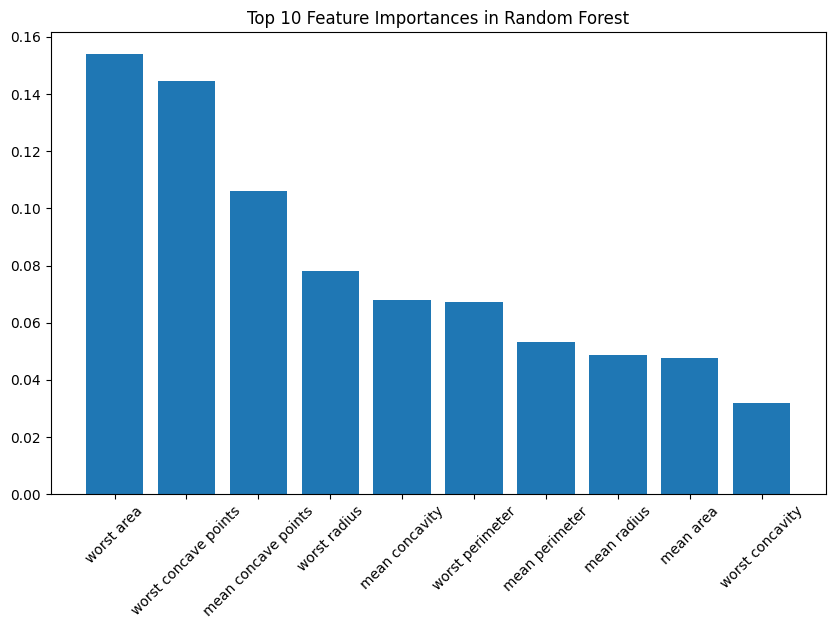

In [23]:
import matplotlib.pyplot as plt

importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.bar(range(10), importances[indices][:10])
plt.xticks(range(10), X.columns[indices][:10], rotation=45)
plt.title("Top 10 Feature Importances in Random Forest")
plt.show()


In [24]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ---------------------------
# Logistic Regression
# ---------------------------
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

log_reg = LogisticRegression(max_iter=500)
log_reg.fit(X_train_scaled, y_train)

y_pred_lr = log_reg.predict(X_test_scaled)
lr_acc = accuracy_score(y_test, y_pred_lr)

# ---------------------------
# Random Forest
# ---------------------------
rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=None,
    random_state=42
)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
rf_acc = accuracy_score(y_test, y_pred_rf)

# ---------------------------
# Results
# ---------------------------
print("Logistic Regression Accuracy:", lr_acc)
print("Random Forest Accuracy:", rf_acc)

print("\nClassification Report (Random Forest):")
print(classification_report(y_test, y_pred_rf))


Logistic Regression Accuracy: 0.9736842105263158
Random Forest Accuracy: 0.9649122807017544

Classification Report (Random Forest):
              precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



## 🌳 Random Forest Regression Implementation

This section applies the **Random Forest algorithm**, an ensemble learning method, to the California Housing regression problem.  
Ensemble methods typically provide higher accuracy than single models such as Linear Regression or Decision Trees.

---

## 1 & 2. Data Loading and Splitting

These steps are identical to the earlier section, ensuring training and testing occur on consistent, separate partitions.

**Goal:**  
Use **80%** of the data for training and **20%** for unbiased evaluation.

---

## 3. Train Random Forest Regressor

A Random Forest is an ensemble of many individual Decision Trees.  
It uses **Bagging (Bootstrap Aggregation)**, where each tree is trained on a different random subset of the data.

### Key Components

- **`RandomForestRegressor()`**  
  Initializes the Random Forest model for regression tasks.

- **`n_estimators = 200`**  
  Number of decision trees in the forest.  
  - More trees → better performance but longer training time.

- **`max_depth = 20`**  
  Limits the depth of each tree to prevent overfitting.

- **`n_jobs = -1`**  
  Uses all available processor cores for faster training.

- **`model.fit(X_train, y_train)`**  
  Trains the model by building 200 decision trees using random subsets of the training data and features.

---

## 4. Prediction

- **`y_pred = model.predict(X_test)`**  
  The final prediction is obtained by **averaging** the outputs of all individual trees.  
  This averaging smooths out errors, making Random Forests more robust and accurate.

---

## 5. Evaluation

The same regression metrics used for Linear Regression are applied here to compare performance.

### **Mean Squared Error (MSE)**  
Measures the average squared prediction error.

$$
\text{MSE} = \frac{1}{n}\sum_{i=1}^{n} (Y_i - \hat{Y}_i)^2
$$

**Expected Outcome:**  
Random Forest typically achieves a **much lower MSE** than Linear Regression due to its ability to capture nonlinear relationships.

---

### **R-squared (\( \text{R}^2 \)) Score**

Represents the proportion of variance explained by the model.

$$
\text{R}^2 = 1 - \frac{\sum_{i=1}^{n} (Y_i - \hat{Y}_i)^2}{\sum_{i=1}^{n} (Y_i - \bar{Y})^2}
$$

**Expected Outcome:**  
Random Forest usually produces an \( \text{R}^2 \) score close to **1**, indicating a strong fit compared to simpler models.

---

## 6. Visualization: Actual vs Predicted

A scatter plot of actual vs. predicted values is used to visually assess performance.

- In an accurate model such as Random Forest, points cluster tightly around the **45° diagonal line** (\( y = x \)),  
  showing that predictions closely match actual values.

---


MSE: 0.25425208965861584
R² Score: 0.8059750094203985


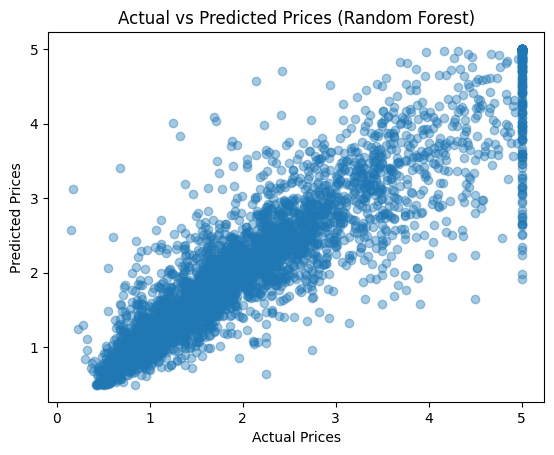

In [25]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# 1. Load dataset
data = fetch_california_housing()
X = data.data
y = data.target

# 2. Split dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 3. Train Random Forest Regressor
model = RandomForestRegressor(
    n_estimators=200,
    max_depth=20,
    random_state=42,
    n_jobs=-1
)
model.fit(X_train, y_train)

# 4. Predict
y_pred = model.predict(X_test)

# 5. Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("R² Score:", r2)

# 6. Plot: Actual vs Predicted
plt.scatter(y_test, y_pred, alpha=0.4)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices (Random Forest)")
plt.show()
